In [1]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import re  #regular expression
from sklearn.preprocessing import StandardScaler
from pandas.plotting import andrews_curves
from mpl_toolkits.mplot3d import Axes3D

<u>Settings for Display & Running Mode</u>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000

In [4]:
%matplotlib inline

<u>Read the datset</u>

In [5]:
customer = pd.read_csv("Mall_Customers.csv")
customer.shape
customer.head()

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<u>Remove Special characters in Column names </u>

In [6]:
new_columns = {x : re.sub('[^A-Za-z]+','',x) for x in customer.columns.values}
new_columns
customer.rename(columns = new_columns,inplace=True)
customer.rename(columns = {"AnnualIncomek": "AnnualIncome"},inplace=True)

{'CustomerID': 'CustomerID',
 'Gender': 'Gender',
 'Age': 'Age',
 'Annual Income (k$)': 'AnnualIncomek',
 'Spending Score (1-100)': 'SpendingScore'}

<u>Create Gender column as numerical categorical type</u> 

In [7]:
customer["Gender"].value_counts()
customer["GenderCode"] = customer["Gender"].map({"Female" : 0, "Male" : 1})

Female    112
Male       88
Name: Gender, dtype: int64

Drop CustomerID and old Gender column

In [8]:
customer.drop(columns=["CustomerID","Gender"], inplace=True)

In [9]:
customer.head()

,Age,AnnualIncome,SpendingScore,GenderCode
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Verify whether any column has null value

In [10]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            200 non-null    int64
 1   AnnualIncome   200 non-null    int64
 2   SpendingScore  200 non-null    int64
 3   GenderCode     200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


Analyse statistical data

In [11]:
customer.describe()

,Age,AnnualIncome,SpendingScore,GenderCode
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


Annual income starts from 15K \\$ to max of 137K \\$. <br/>
Spending score starts from 1 to max upto 99 <br>
Mean and Median are almost same for both Annual Income and Spending Score

<u>Count plot to see the Gender count</u>

Text(0.0, 112.1, '112')

Text(1.0, 88.1, '88')

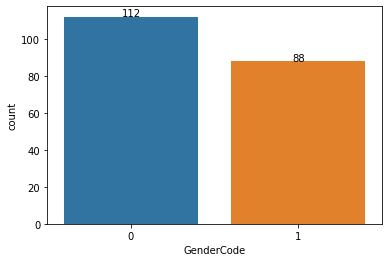

In [12]:
values = customer["GenderCode"].value_counts()
ax = sns.countplot(customer["GenderCode"])
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

<u>Andrew Curve :</u> Gender Code 0 and 1 both mixed up in the dataset

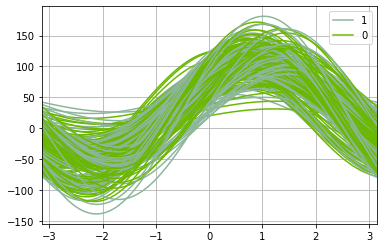

In [13]:
andrews_curves(customer, "GenderCode")

<u> Box plot of all columns with respect to Gender</u>

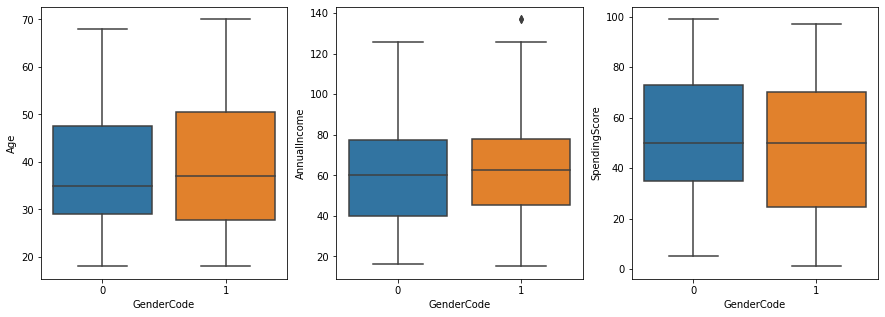

In [14]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.boxplot(data=customer, x="GenderCode",y="Age")
ax=plt.subplot(1,3,2)
sns.boxplot(data=customer, x="GenderCode",y="AnnualIncome")
ax=plt.subplot(1,3,3)
sns.boxplot(data=customer, x="GenderCode",y="SpendingScore")


Based on the box plots, Good Annual income and Spending scores in both Male & Female 

<b>Some other visualization plots to analyse</b>

<u>Strip Plot</u>

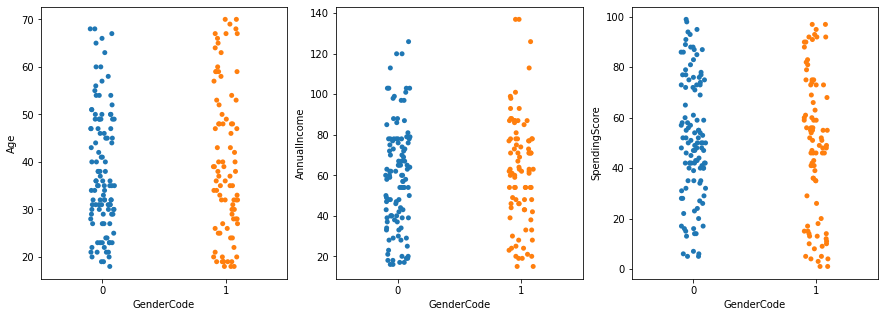

In [15]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.stripplot(data=customer, x="GenderCode",y="Age")
ax=plt.subplot(1,3,2)
sns.stripplot(data=customer, x="GenderCode",y="AnnualIncome")
ax=plt.subplot(1,3,3)
sns.stripplot(data=customer, x="GenderCode",y="SpendingScore")

<u>Swarm Plot</u>

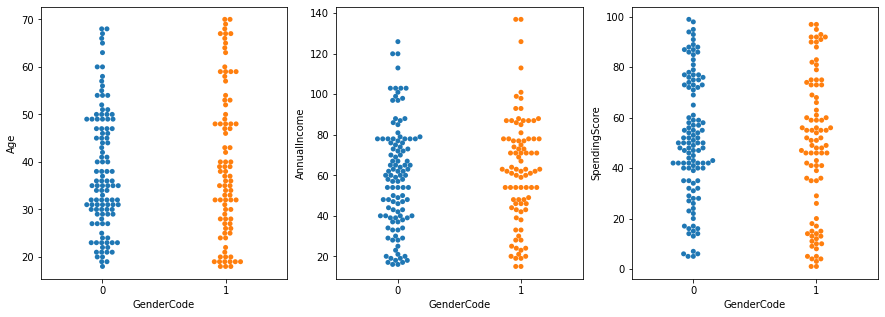

In [16]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.swarmplot(data=customer, x="GenderCode",y="Age")
ax=plt.subplot(1,3,2)
sns.swarmplot(data=customer, x="GenderCode",y="AnnualIncome")
ax=plt.subplot(1,3,3)
sns.swarmplot(data=customer, x="GenderCode",y="SpendingScore")

<u> Distribution Plots </u>

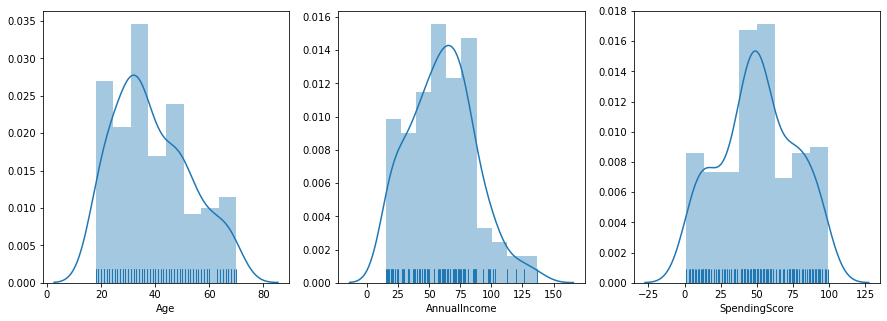

In [17]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.distplot(customer.Age, rug=True)
ax=plt.subplot(1,3,2)
sns.distplot(customer.AnnualIncome, rug=True)
ax=plt.subplot(1,3,3)
sns.distplot(customer.SpendingScore, rug=True)

<u> Pair Plots </u>

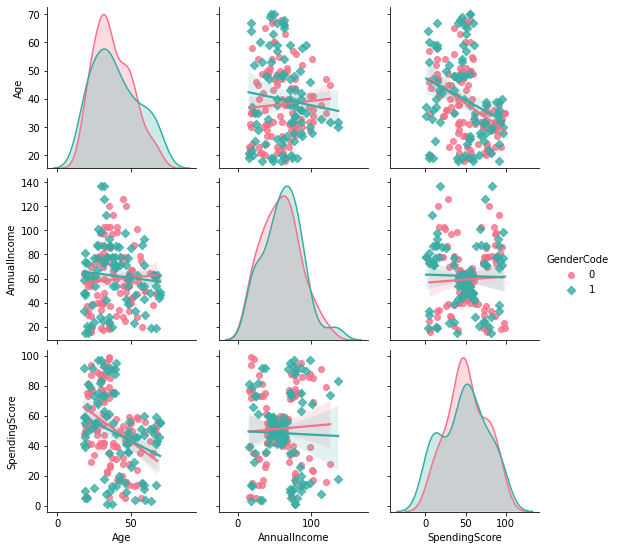

In [18]:
sns.pairplot(customer, vars=["Age","AnnualIncome","SpendingScore"], diag_kind="kde"
             , kind="reg", hue="GenderCode", markers=["o","D"],palette="husl")

<u> Scatter Plots </u>

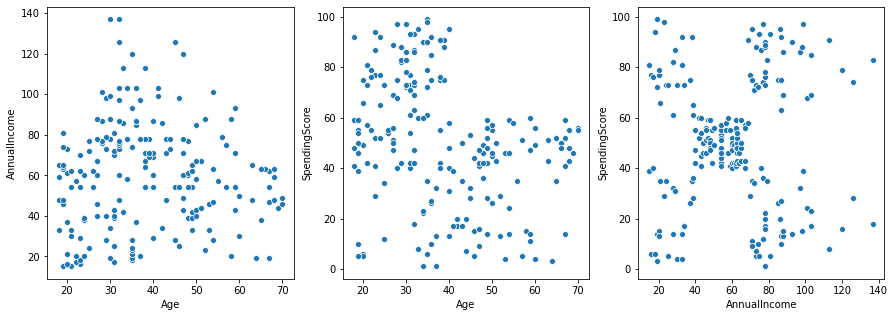

In [19]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.scatterplot(data=customer, x="Age",y="AnnualIncome")
ax=plt.subplot(1,3,2)
sns.scatterplot(data=customer, x="Age",y="SpendingScore")
ax=plt.subplot(1,3,3)
sns.scatterplot(data=customer, x="AnnualIncome",y="SpendingScore")

<u> Regression Plots </u>

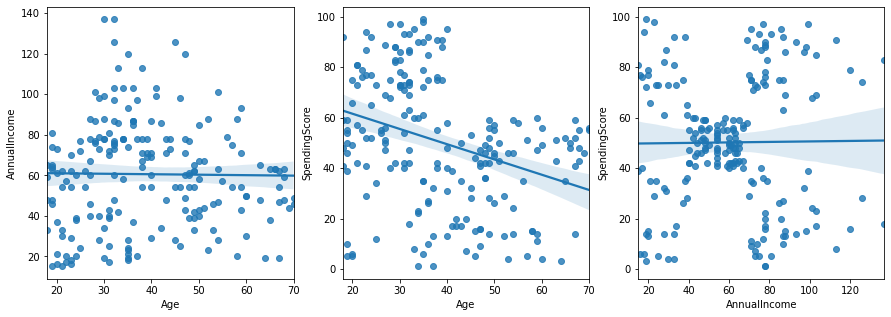

In [20]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,3,1)
sns.regplot(data=customer, x="Age",y="AnnualIncome")
ax=plt.subplot(1,3,2)
sns.regplot(data=customer, x="Age",y="SpendingScore")
ax=plt.subplot(1,3,3)
sns.regplot(data=customer, x="AnnualIncome",y="SpendingScore")

From all the above plots,we could see the data is distributed well in the given data set.<br/>

<u>Animation Graph </u>

In [21]:
px.scatter(customer.sort_values(by="Age"),
          x = "AnnualIncome",
          y = "SpendingScore",
          #size = "GenderCode",
          range_x=[0,140],
          range_y=[0,100] ,
          animation_frame = "Age", 
          animation_group = "GenderCode", 
          color = "GenderCode" 
          )

**Some 3D graphs**

Text(0.5, 0, 'Age')

Text(0.5, 0, 'AnnualIncome')

Text(0.5, 0, 'SpendingScore')

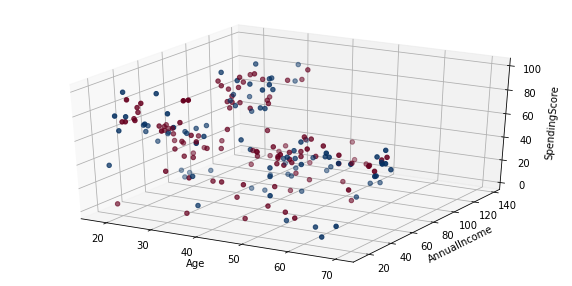

In [22]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.scatter3D(customer['Age'], customer['AnnualIncome'], customer['SpendingScore']
             , c=customer['GenderCode'], cmap='RdBu');
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')

Text(0.5, 0, 'Age')

Text(0.5, 0, 'AnnualIncome')

Text(0.5, 0, 'SpendingScore')

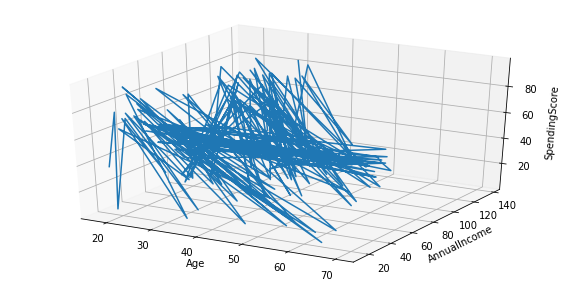

In [23]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes(projection='3d')
ax.plot(customer['Age'], customer['AnnualIncome'], customer['SpendingScore']);
ax.set_xlabel('Age')
ax.set_ylabel('AnnualIncome')
ax.set_zlabel('SpendingScore')

<hr/>
Now we will see clustering information

<u>Scaling of the dataset</u>

In [24]:
ss= StandardScaler()
ss.fit(customer)
X = ss.transform(customer)
X.shape

StandardScaler()

(200, 4)

Scree plot using K-Means Algorithm

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

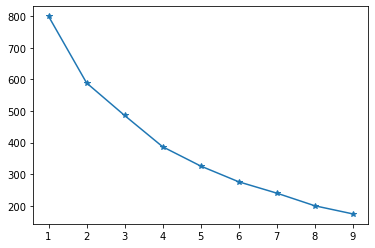

In [25]:
sse = []
for k in range(1,10):
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(range(1,10), sse, marker='*')

Scree plot using Gaussian Mixture Algorithm

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

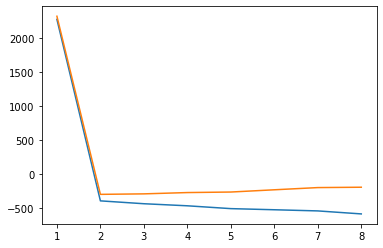

In [26]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.show()

Based on Scree plot using Gaussian Mixture Algorithm, we could finalize 2 cluster groups

<u>Clustering visualization using K-Means Algorithm</u>

KMeans(max_iter=800, n_clusters=2)

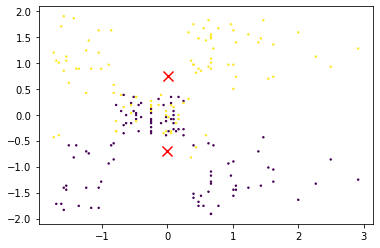

In [27]:
kmeans_bad = KMeans(n_clusters=2,
                    n_init =10,
                    max_iter = 800)
kmeans_bad.fit(X)

centroids=kmeans_bad.cluster_centers_

fig = plt.figure()
plt.scatter(X[:, 1], X[:, 2],
            c=kmeans_bad.labels_,
            s=2)
plt.scatter(centroids[:, 1], centroids[:, 2],
            marker='x',
            s=100,               # marker size
            linewidths=150,      # linewidth of marker edges
            color='red'
            )
plt.show()

Clustering Visualization using Gaussian Mixture Algorithm

GaussianMixture(n_components=2, n_init=10)

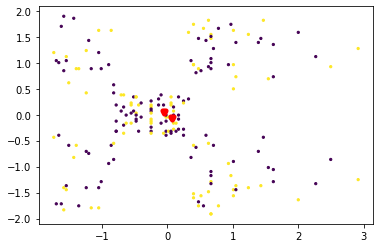

In [28]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)
#gm.means_
#gm.converged_
#gm.n_iter_
#gm.predict(X)
#gm.weights_
#np.unique(gm.predict(X), return_counts = True)[1]/len(X)
#gm.sample()
fig = plt.figure()

plt.scatter(X[:, 1], X[:, 2],
            c=gm.predict(X),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )
plt.show()


TSNE Visualization using Gaussian Mixture Algorithm

GaussianMixture(n_components=2, n_init=10)

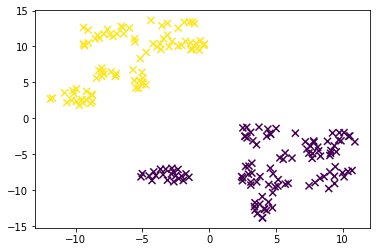

In [29]:
gm = GaussianMixture(
                     n_components = 2,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

Anamalies

array([-0.83775397, -0.58035867, -2.54021473,  0.60920406,  1.27988046,
        0.63923725, -0.42793009, -0.15385373, -0.95962745,  1.255034  ,
       -0.74010882, -0.62903181, -0.02333736,  0.91367055, -0.13929249,
       -0.11562118,  1.54404036,  0.0107663 ,  0.79286646, -0.2814034 ,
        0.90060347,  0.46833768,  0.27975199,  0.80488019,  0.70935509,
        0.61201801,  1.83658325,  1.29383133,  1.9099709 ,  0.88014591,
       -0.10085505,  1.31980706,  0.28433426, -0.16847399,  1.17978766,
        1.19869139,  1.45547173,  1.96704855,  1.87527764,  1.44113103,
        0.16207586,  0.40752638,  1.71991627,  2.44416019,  1.98445734,
        2.01151231,  1.96745869,  2.15867154,  2.18508739,  2.32215985,
        2.19128031,  1.81267208,  2.57801103,  1.01789699,  2.22455838,
        1.91046142,  2.10022328,  0.25504407,  2.36198526,  1.75358906,
       -0.08254891,  1.06872815, -0.4070379 ,  1.56985232,  0.93018883,
        1.04475792,  2.72784013, -0.43310243,  1.13916927,  2.64

-0.7435201180427374

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.42456879,  0.78018313, -1.75473454,  1.12815215],
       [-0.41983513,  2.00160487, -1.63826986,  1.12815215],
       [ 0.58489852,  2.26879087, -1.32769738, -0.88640526],
       [ 0.44136514,  2.49780745, -0.86183865, -0.88640526],
       [-0.49160182,  2.49780745,  0.92395314,  1.12815215],
       [-0.49160182,  2.91767117, -1.25005425,  1.12815215],
       [-0.6351352 ,  2.91767117,  1.27334719,  1.12815215]])

(10, 4)

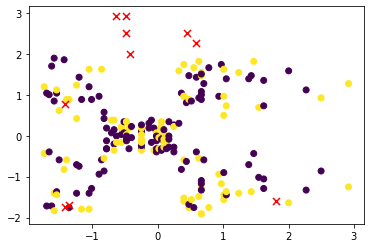

In [30]:
densities = gm.score_samples(X)
densities

density_threshold = np.percentile(densities,5)
density_threshold

anomalies = X[densities < density_threshold]
anomalies
anomalies.shape



fig = plt.figure()
plt.scatter(X[:, 1], X[:, 2], c = gm.predict(X))
plt.scatter(anomalies[:, 0], anomalies[:, 1],
            marker='x',
            s=50,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )


In [31]:
unanomalies = X[densities >= density_threshold]
unanomalies.shape   

df_anomalies = pd.DataFrame(anomalies[:,[1,2]], columns=['salary','spendingscore'])
df_anomalies['type'] = 'anomalous'   # Create a IIIrd constant column
df_normal = pd.DataFrame(unanomalies[:,[1,2]], columns=['salary','spendingscore'])
df_normal['type'] = 'unanomalous'    # Create a IIIrd constant column



(190, 4)

In [32]:
df_anomalies.head()
df_normal.head()

,salary,spendingscore,type
0,-1.738999,-0.434801,anomalous
1,-1.700830,-1.715913,anomalous
2,-1.586321,-1.832378,anomalous
3,0.780183,-1.754735,anomalous
4,2.001605,-1.638270,anomalous


,salary,spendingscore,type
0,-1.738999,1.195704,unanomalous
1,-1.700830,1.040418,unanomalous
2,-1.662660,-0.395980,unanomalous
3,-1.662660,1.001596,unanomalous
4,-1.624491,-1.715913,unanomalous


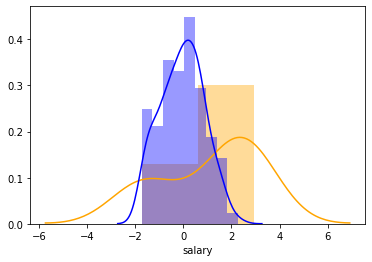

In [33]:

# 7.3 Let us see density plots
sns.distplot(df_anomalies['salary'], color='orange')
sns.distplot(df_normal['salary'], color='blue')


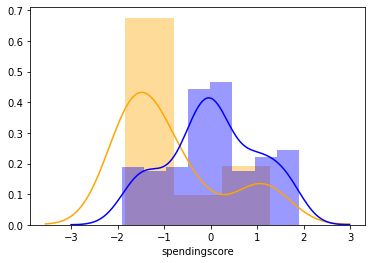

In [34]:
sns.distplot(df_anomalies['spendingscore'], color='orange')
sns.distplot(df_normal['spendingscore'], color='blue')

In [35]:

df = pd.concat([df_anomalies,df_normal])
df_anomalies.shape
df_normal.shape
df.shape


(10, 3)

(190, 3)

(200, 3)

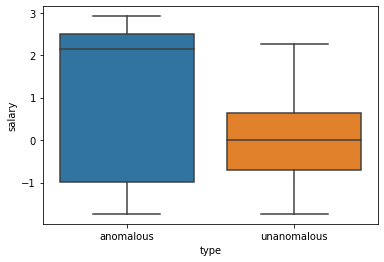

In [36]:
sns.boxplot(x = df['type'], y = df['salary'])

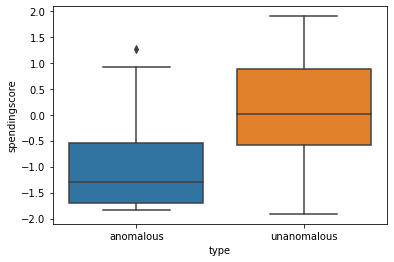

In [37]:
sns.boxplot(x = df['type'], y = df['spendingscore'])

I just want to see the clustering without Gender columns <br>

<u>Clustering without Gender field</u>

In [38]:
customer_NoGender = customer.copy() #Deep Copy
customer_NoGender.drop(columns=["GenderCode"], inplace = True)
#customer.head()
customer_NoGender.head()

,Age,AnnualIncome,SpendingScore
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [39]:
ss= StandardScaler()
ss.fit(customer_NoGender)
X = ss.transform(customer_NoGender)

StandardScaler()

GaussianMixture(n_init=10)

GaussianMixture(n_components=2, n_init=10)

GaussianMixture(n_components=3, n_init=10)

GaussianMixture(n_components=4, n_init=10)

GaussianMixture(n_components=5, n_init=10)

GaussianMixture(n_components=6, n_init=10)

GaussianMixture(n_components=7, n_init=10)

GaussianMixture(n_components=8, n_init=10)

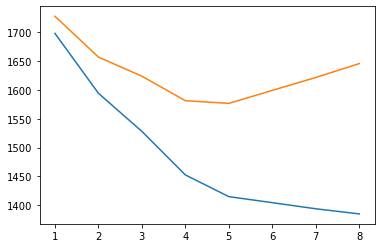

In [40]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture(
                     n_components = i+1,
                     n_init = 10,
                     max_iter = 100)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.show()

Without Gender field, Scree plot shows that we will have 5 clusters

GaussianMixture(n_components=5, n_init=10)

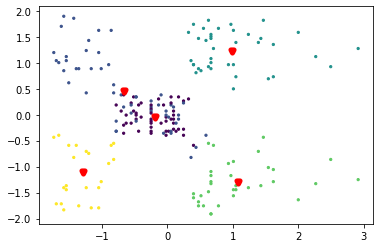

In [41]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)
#gm.means_
#gm.converged_
#gm.n_iter_
#gm.predict(X)
#gm.weights_
#np.unique(gm.predict(X), return_counts = True)[1]/len(X)
#gm.sample()
fig = plt.figure()

plt.scatter(X[:, 1], X[:, 2],
            c=gm.predict(X),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red'
            )

In [42]:
gm = GaussianMixture(
                     n_components = 5,
                     n_init = 10,
                     max_iter = 100)
gm.fit(X)

GaussianMixture(n_components=5, n_init=10)

TSNE Visualization for 5 Clusters (without Gender field)

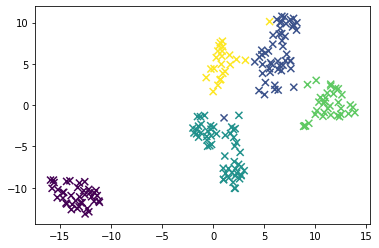

In [43]:
tsne = TSNE(n_components = 2)
tsne_out = tsne.fit_transform(X)
plt.scatter(tsne_out[:, 0], tsne_out[:, 1],
            marker='x',
            s=50,              # marker size
            linewidths=5,      # linewidth of marker edges
            c=gm.predict(X)   # Colour as per gmm
            )

**End:**

1. With Gender Column (2 clusters)
2. Without Gender Column (5 clusters)
